In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns ; sns.set()

%matplotlib inline

In [2]:
jobs = pd.read_csv('cleaned_list.csv')
print(jobs.shape)
print(jobs.nunique())
jobs.head()

(300, 25)
Job Title            140
Salary Estimate       10
Job Description      271
Rating                25
Company Name         230
Location             129
Headquarters         141
Size                   9
Founded               80
Type of ownership     12
Industry              44
Sector                21
Revenue               14
Competitors           52
hourly                 1
min_salary            10
max_salary            10
avg_salary             9
city                 127
state                 35
same_state             2
company_age           80
job_tag                5
job_level              2
num_competitors        4
dtype: int64


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,min_salary,max_salary,avg_salary,city,state,same_state,company_age,job_tag,job_level,num_competitors
0,Data Scientist,70-116,"Secure our Nation, Ignite your Future\r\n\r\nJ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,70,116,93.0,Chantilly,VA,0,52,data scientist,NaN,0
1,Data Scientist,70-116,"VA Boston Healthcare System\r\nBoston, Massach...",3.6,VA Boston Healthcare System,"Boston, MA","Boston, MA",201 to 500 employees,-1,Hospital,...,70,116,93.0,Boston,MA,1,-1,data scientist,NaN,0
2,Data & Analytics Consultant,70-116,WHO WE LOOK FOR\r\n\r\nAn SEI Consultant is a ...,4.6,SEI,"Cincinnati, OH","Cincinnati, OH",201 to 500 employees,1992,Company - Private,...,70,116,93.0,Cincinnati,OH,1,28,other,NaN,0
3,R&D Scientist,70-116,"Since 2001, Hygiena has been on a mission to b...",3.9,Hygiena,"New Castle, DE","Camarillo, CA",201 to 500 employees,-1,Company - Private,...,70,116,93.0,New Castle,DE,0,-1,other,NaN,2
4,Data Scientist,70-116,Why We Work at Dun & Bradstreet\r\n\r\n\r\nWe ...,3.1,Dun & Bradstreet,"Austin, TX","Short Hills, NJ",1001 to 5000 employees,1841,Company - Private,...,70,116,93.0,Austin,TX,0,179,data scientist,NaN,2


Text(0.5, 1.0, 'Histogram of Avg. Job Salaries')

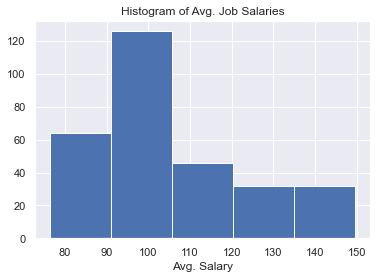

In [4]:
jobs.avg_salary.hist(bins=5)
plt.xlabel('Avg. Salary')
plt.title('Histogram of Avg. Job Salaries')

Text(0.5, 1.0, 'Histogram of Avg. Job Raitings')

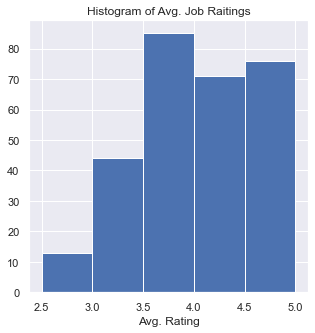

In [5]:
fig, ax = plt.subplots(figsize=(5,5))
jobs[jobs['Rating'] != -1].Rating.hist(bins=5)
ax.set_xlabel('Avg. Rating')
ax.set_title('Histogram of Avg. Job Raitings')

In [6]:
print(jobs['Size'].value_counts())
print(jobs['state'].value_counts())
print(jobs['job_tag'].value_counts())
print(jobs['job_level'].value_counts())

51 to 200 employees        68
10000+ employees           63
1 to 50 employees          44
1001 to 5000 employees     39
201 to 500 employees       32
5001 to 10000 employees    22
501 to 1000 employees      21
Unknown                     8
-1                          3
Name: Size, dtype: int64
 CA          70
 MA          27
 NY          24
 TX          21
 VA          20
 WA          13
 DC          13
 IL          10
 NJ           9
 PA           9
 MO           8
 OH           8
 NC           6
 WI           4
 MI           4
 CO           4
 FL           4
 MD           4
 AL           3
 AZ           3
 GA           3
 CT           3
 UT           2
 NE           2
 MN           2
 PR           2
 IA           1
 LA           1
 Arapahoe     1
 DE           1
 AR           1
 TN           1
 NM           1
 KS           1
 KY           1
Name: state, dtype: int64
data scientist    238
other              44
data engineer      10
data analyst        5
mle                 3
Name: job

In [7]:
jobs.state.unique()

array([' VA', ' MA', ' OH', ' DE', ' TX', ' CA', ' NE', ' MD', ' DC',
       ' WA', nan, ' NY', ' WI', ' PA', ' NC', ' FL', ' IL', ' KY', ' AL',
       ' NJ', ' MI', ' MO', ' MN', ' KS', ' AR', ' CO', ' TN', ' LA',
       ' AZ', ' IA', ' GA', ' UT', ' PR', ' NM', ' CT', ' Arapahoe'],
      dtype=object)

In [8]:
# mapping by region to run statistal tests 

region = {' VA' :'SouthEast', ' MA':'NorthEast', ' OH':'MidWest', ' DE':'NorthEast', ' TX':'SouthWest', ' CA':'West', ' NE':'NorthEast', ' MD':'NorthEast', ' DC':'NorthEast',
       ' WA':'West',' NY':'NorthEast', ' WI':'MidWest', ' PA':'NorthEast', ' NC':'SouthEast', ' FL':'SouthEast', ' IL':'MidWest', ' KY':'SouthEast', ' AL':'SouthEast',
       ' NJ':'NorthEast', ' MI':'MidWest', ' MO':'West', ' MN':'MidWest', ' KS':'MidWest', ' AR':'SouthWest', ' CO':'West', ' TN':'SouthEast', ' LA':'SouthEast',
       ' AZ':'SouthWest', ' IA':'MidWest', ' GA':'SouthEast', ' UT':'West', ' PR':'SouthWest', ' NM': 'SouthWest', ' CT':'NorthEast', 
    
}

jobs['region'] = jobs.state.map(region)
jobs.region

0      SouthEast
1      NorthEast
2        MidWest
3      NorthEast
4      SouthWest
         ...    
295         West
296         West
297    SouthWest
298    NorthEast
299    SouthEast
Name: region, Length: 300, dtype: object

In [9]:
jobs['region'].value_counts()

West         97
NorthEast    92
SouthEast    39
MidWest      30
SouthWest    28
Name: region, dtype: int64

In [10]:
# since value counts seem to be similar we can create histogrmas to make sure they're about normal and the run a/b tests on the regions

jobs.groupby('region').mean()

,Rating,Founded,hourly,min_salary,max_salary,avg_salary,same_state,company_age,num_competitors
region,,,,,,,,,
MidWest,3.803333,1840.966667,0.0,79.966667,117.500000,98.733333,0.333333,44.233333,0.600000
NorthEast,3.842391,1587.391304,0.0,81.380435,126.184783,103.782609,0.478261,37.000000,0.423913
SouthEast,3.579487,1476.102564,0.0,79.461538,123.282051,101.371795,0.282051,25.435897,0.358974
SouthWest,3.510714,1541.214286,0.0,80.500000,123.535714,102.017857,0.178571,45.500000,0.821429
West,3.973196,1709.402062,0.0,85.742268,131.298969,108.520619,0.422680,18.762887,0.938144


SouthEast


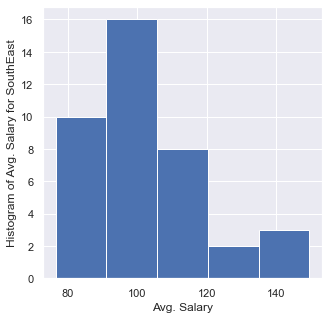

NorthEast


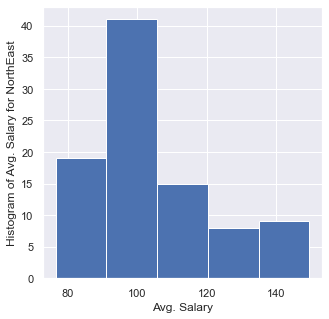

MidWest


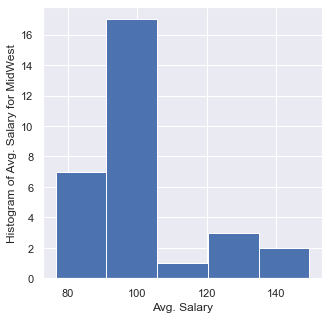

SouthWest


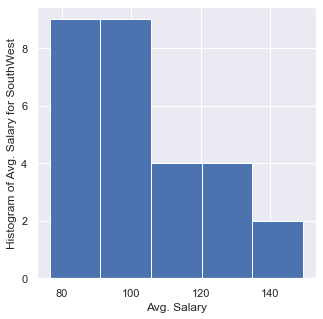

West


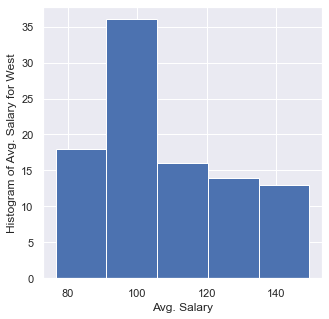

nan


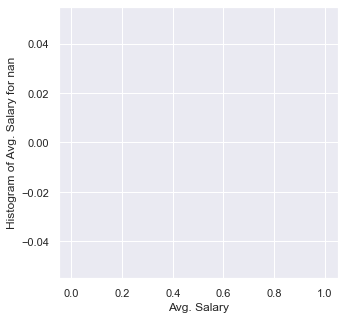

In [11]:
uniq_region = jobs.region.unique()

for reg in uniq_region:
    temp = jobs[jobs['region']==reg]
    print(reg)
    fig, ax = plt.subplots(figsize=(5,5))
    chart = temp.avg_salary.hist(bins=5)
    ax.set_xlabel('Avg. Salary')
    ax.set_ylabel('Histogram of Avg. Salary for {}'.format(reg))
    plt.show()
#     print(reg)


Industry


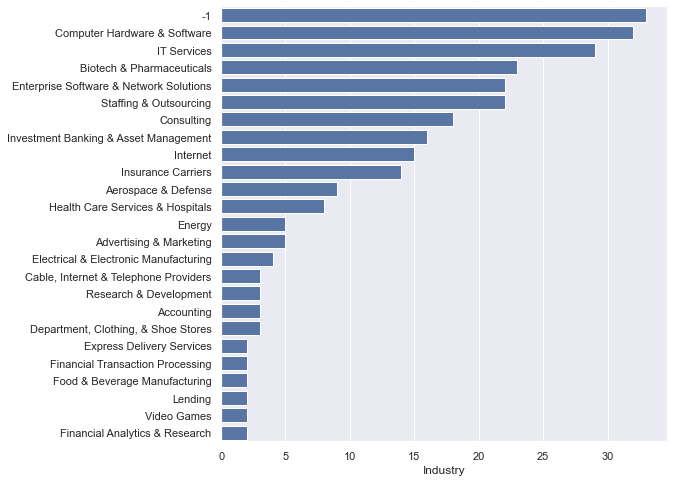

Sector


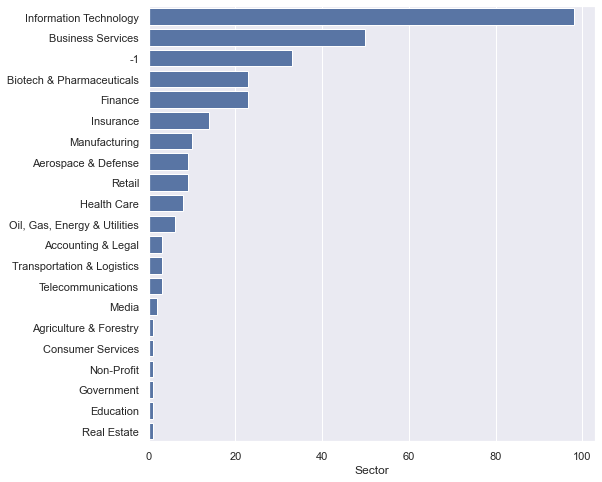

Size


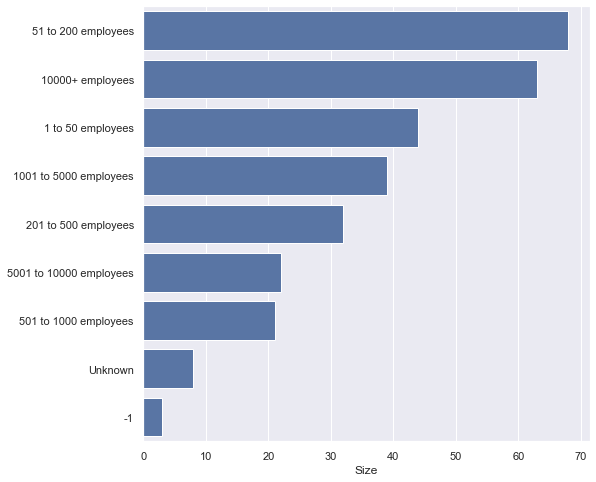

Type of ownership


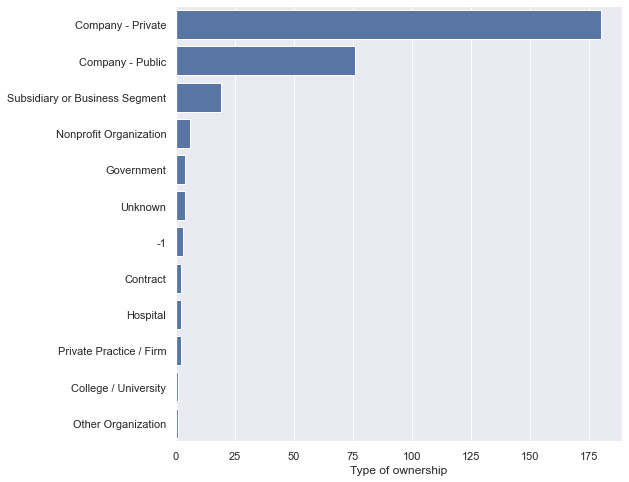

company_age


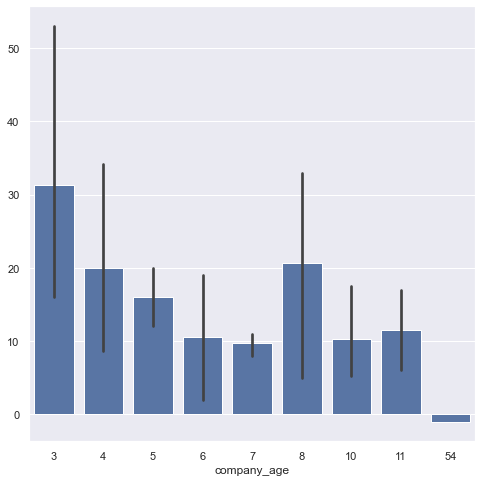

Revenue


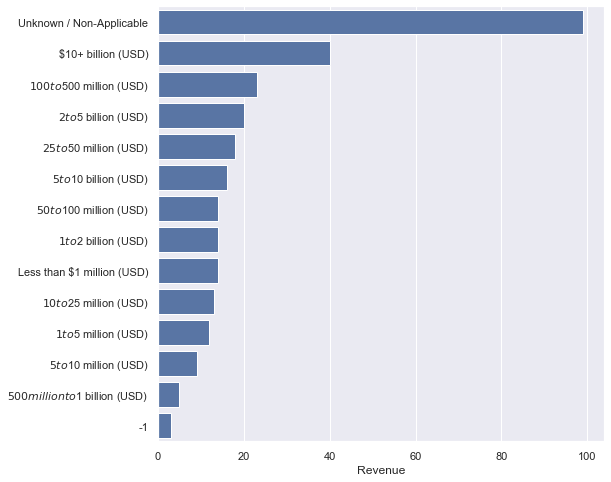

job_tag


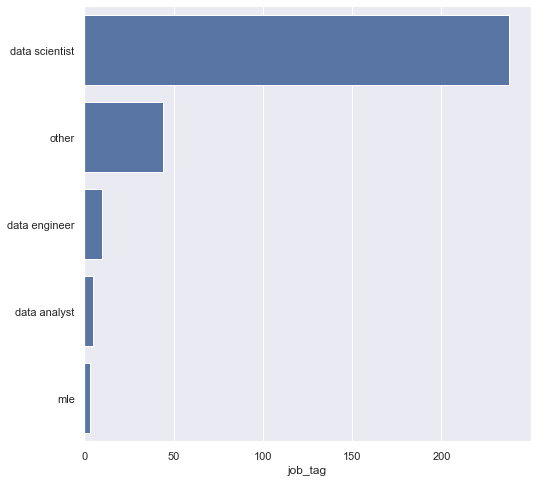

job_level


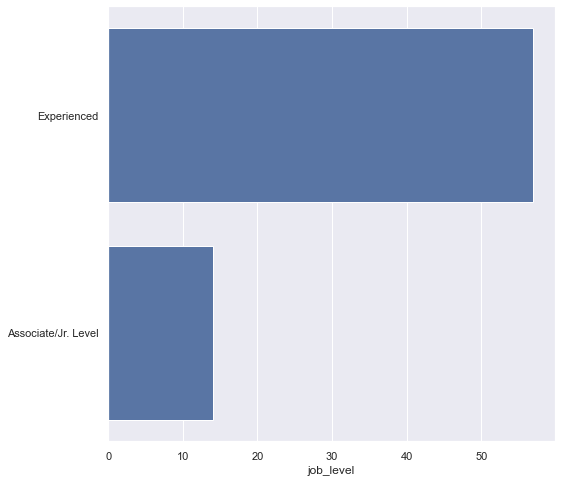

region


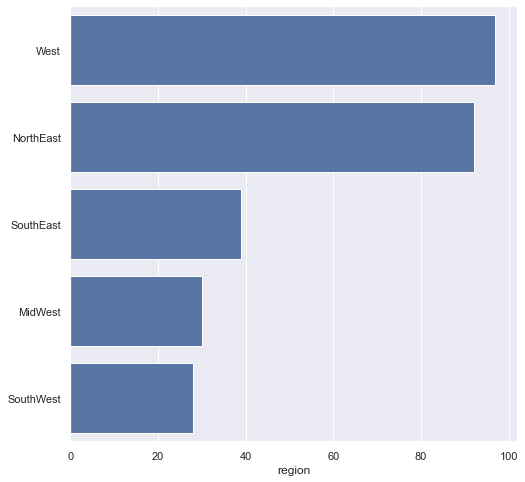

state


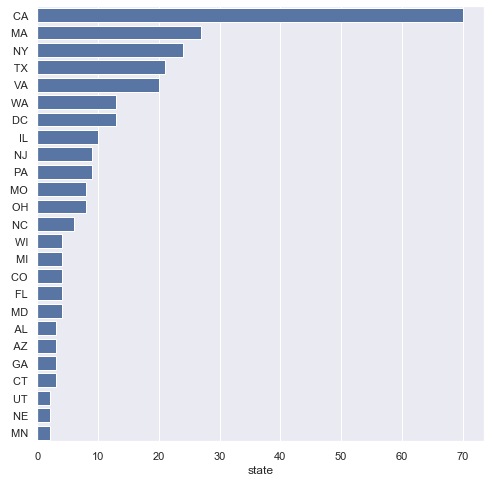

In [12]:
jobs_cat = jobs[['Industry','Sector', 'Size', 'Type of ownership', 'company_age', 'Revenue', 'job_tag', 'job_level', 'region', 'state']]
sns.set()
for cat in jobs_cat.columns:
    temp = jobs[cat].value_counts()[:25]
    print(cat)
    plt.figure(figsize=(8,8))
    graph = sns.barplot(y=temp.index, x=temp, color='b')
    plt.show()

In [13]:
# # WordCloud 

# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize

# # cleaning our job description col
# def remove_punct(text):
#     words_tokenized = []
#     stop_words = set(stopwords.words('english'))
#     word_tokens = word_tokenize(text)
    
#     for word in word_tokens:
#         if word not in stop_words and word.isalpha():
#             words_tokenized.append(word.lower())
#     return(words_tokenized)

# words = ' '.join(jobs['Job Description'])
# words = remove_punct(words)


ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
# text = ' '.join(word for word in words)  # creating large block of words for wordcloud

# wc = WordCloud(background_color='white', stopwords=STOPWORDS, width=1600, height=800)
# wc.generate(text)

# plt.figure(figsize=(10,10))
# plt.imshow(wc, interpolation='bilinear')
# plt.axis('off')
# plt.show()

In [14]:
north_east = jobs[jobs['region']== 'NorthEast']
west = jobs[jobs['region']== 'West']
south_east = jobs[jobs['region']== 'SouthEast']
mid_west = jobs[jobs['region']== 'MidWest']
south_west = jobs[jobs['region']== 'SouthWest']

regions = ['north_east', 'west', 'south_east','mid_west','south_west']

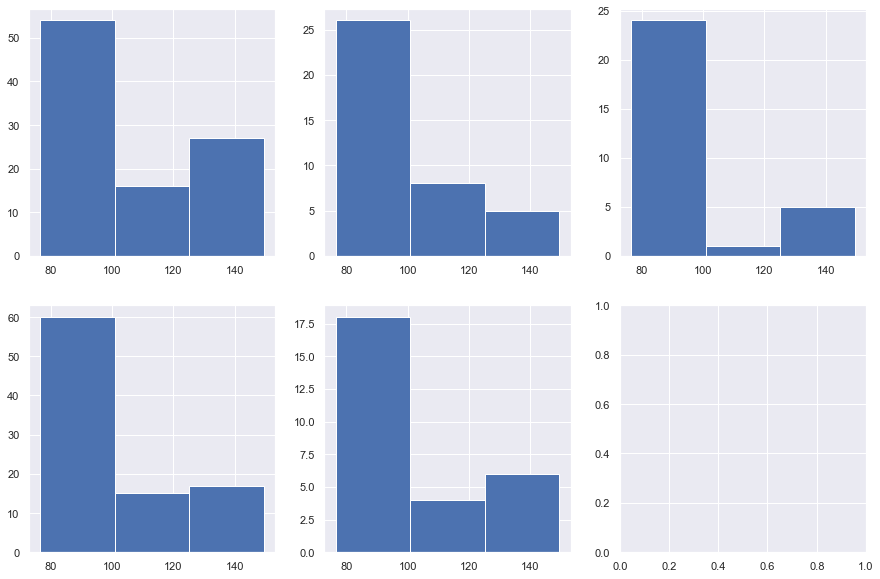

In [15]:
fig, ax = plt.subplots(2,3, figsize=(15,10))
west.avg_salary.hist(bins=3, ax=ax[0,0])
north_east.avg_salary.hist(bins=3, ax= ax[1,0])
south_east.avg_salary.hist(bins=3, ax=ax[0,1])
south_west.avg_salary.hist(bins=3, ax=ax[1,1])
mid_west.avg_salary.hist(bins=3, ax=ax[0,2])

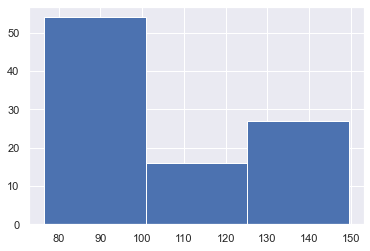

In [16]:
west.avg_salary.hist(bins=3)

In [ ]:
north_east.avg_salary.hist(bins=3)

In [ ]:
import scipy.stats as stats


In [ ]:
stats.ttest_ind(jobs[jobs['region']== 'NorthEast'].avg_salary, 
               jobs[jobs['region']== 'West'].avg_salary, equal_var=True)

In [ ]:
stats.ttest_ind(jobs[jobs['region']== 'NorthEast'].avg_salary, 
               jobs[jobs['region']== 'SouthEast'].avg_salary, equal_var=False)

In [ ]:
jobs.to_csv('eda_cleaned_data.csv', index=False)

In [17]:
jobs.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'city', 'state',
       'same_state', 'company_age', 'job_tag', 'job_level', 'num_competitors',
       'region'],
      dtype='object')

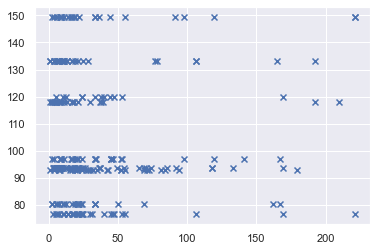

In [24]:
plt.scatter(jobs[jobs['company_age'] >= 0].company_age, jobs[jobs['company_age'] >= 0].avg_salary, marker='x')

In [22]:
jobs[jobs['company_age'] >= 0]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,max_salary,avg_salary,city,state,same_state,company_age,job_tag,job_level,num_competitors,region
0,Data Scientist,70-116,"Secure our Nation, Ignite your Future\r\n\r\nJ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,116,93.0,Chantilly,VA,0,52,data scientist,NaN,0,SouthEast
2,Data & Analytics Consultant,70-116,WHO WE LOOK FOR\r\n\r\nAn SEI Consultant is a ...,4.6,SEI,"Cincinnati, OH","Cincinnati, OH",201 to 500 employees,1992,Company - Private,...,116,93.0,Cincinnati,OH,1,28,other,NaN,0,MidWest
4,Data Scientist,70-116,Why We Work at Dun & Bradstreet\r\n\r\n\r\nWe ...,3.1,Dun & Bradstreet,"Austin, TX","Short Hills, NJ",1001 to 5000 employees,1841,Company - Private,...,116,93.0,Austin,TX,0,179,data scientist,NaN,2,SouthWest
5,"Scientist, Pharmacology",70-116,Sutro has a unique capability that enables new...,4.3,Dun & Bradstreet,"Austin, TX","South San Francisco, CA",51 to 200 employees,2003,Company - Public,...,116,93.0,Austin,TX,0,17,other,NaN,0,SouthWest
6,Sr. Data Scientist,70-116,Sr. Data Scientist\r\nCurative is scaling up C...,4.0,"Curative Inc,","San Dimas, CA","Racine, WI",51 to 200 employees,1949,Nonprofit Organization,...,116,93.0,San Dimas,CA,0,71,data scientist,Experienced,0,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,Lead Data Scientist,92-148,"Job Description\r\n\r\nSince 1851, MassMutuals...",3.7,MassMutual,"Boston, MA","Springfield, MA",5001 to 10000 employees,1851,Company - Private,...,148,120.0,Boston,MA,0,169,data scientist,Experienced,0,NorthEast
295,"Video Business Data Scientist, Apple Media Pro...",92-148,"Posted: Jun 22, 2020\r\nRole Number:\r\n200172...",4.1,Apple,"Culver City, CA","Cupertino, CA",10000+ employees,1976,Company - Public,...,148,120.0,Culver City,CA,0,44,data scientist,NaN,3,West
296,Data Scientist,92-148,"Data Scientist\r\nLocation: Hill AFB, UT\r\nEd...",3.8,Tecolote Research,"Hill AFB, UT","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,148,120.0,Hill AFB,UT,0,47,data scientist,NaN,0,West
297,Data Scientist,92-148,Role: Data Science | Machine Learning\r\nWork ...,4.0,SOFTHQ INC,"Austin, TX","San Diego, CA",51 to 200 employees,2010,Company - Private,...,148,120.0,Austin,TX,0,10,data scientist,NaN,0,SouthWest


<module 'matplotlib.pyplot' from 'C:\\Users\\Ekene\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

<Figure size 1080x1080 with 0 Axes>

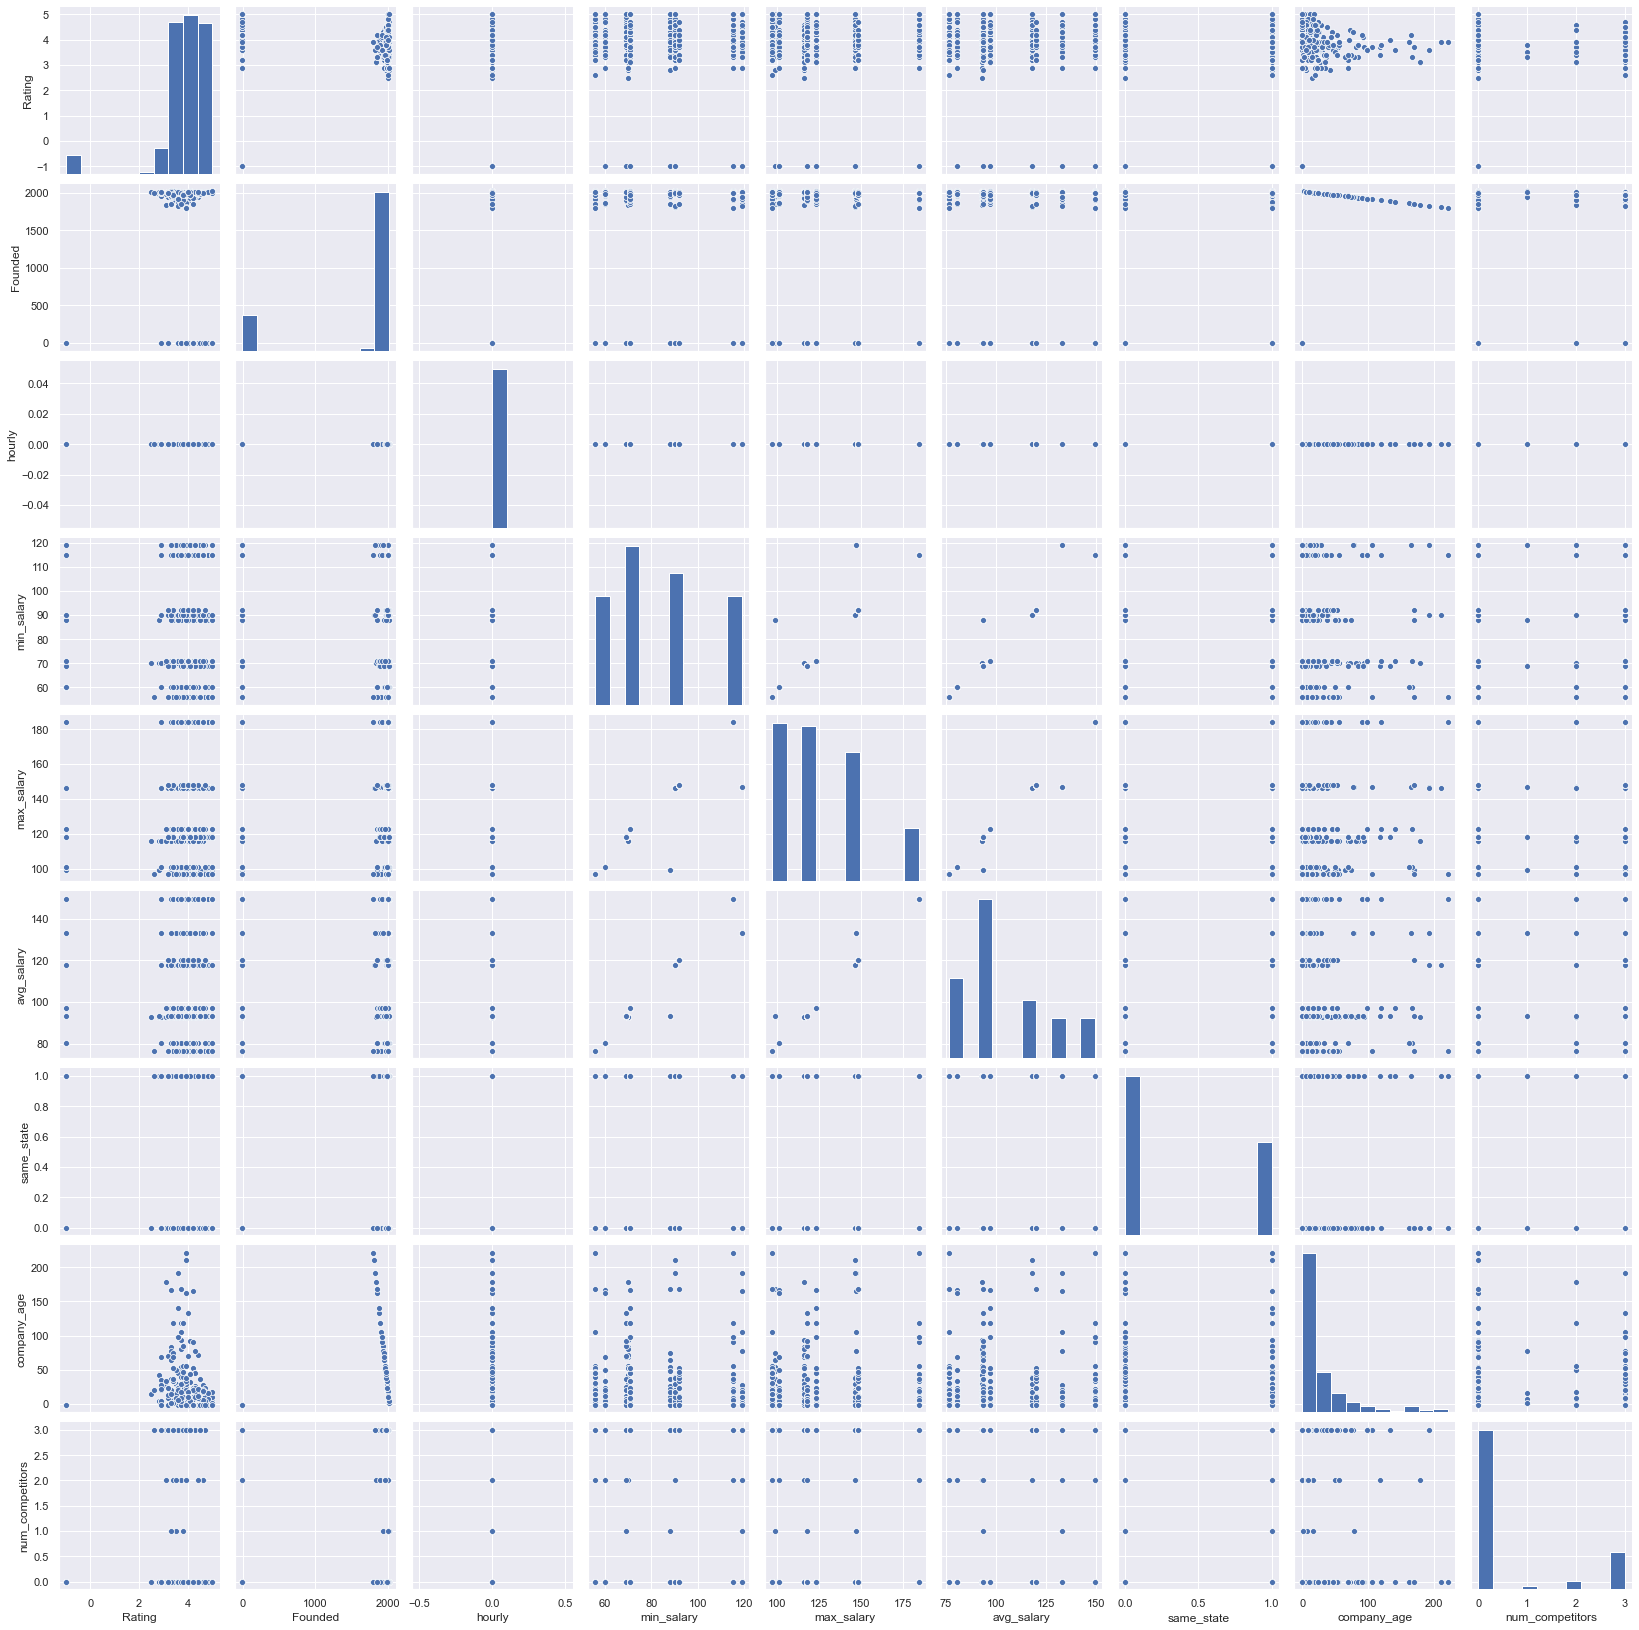

In [27]:
plt.figure(figsize=(15,15))
sns.pairplot(jobs)
plt.show()